In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
df = pd.read_csv('QVI_data.csv')

In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
sorted_df = df.sort_values('DATE')

In [5]:
#Changing the dtype to Date
pd.to_datetime(sorted_df['DATE'])

101808   2018-07-01
118872   2018-07-01
221754   2018-07-01
147394   2018-07-01
29702    2018-07-01
            ...    
87112    2019-06-30
194066   2019-06-30
194046   2019-06-30
242433   2019-06-30
243910   2019-06-30
Name: DATE, Length: 264834, dtype: datetime64[ns]

In [6]:
sorted_df['Month']=  pd.DatetimeIndex(sorted_df['DATE']).month
sorted_df['Day']=  pd.DatetimeIndex(sorted_df['DATE']).weekday

In [7]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
sorted_df['Month'] = sorted_df['Month'].map(month_map)

# Monthly overall sales revenue

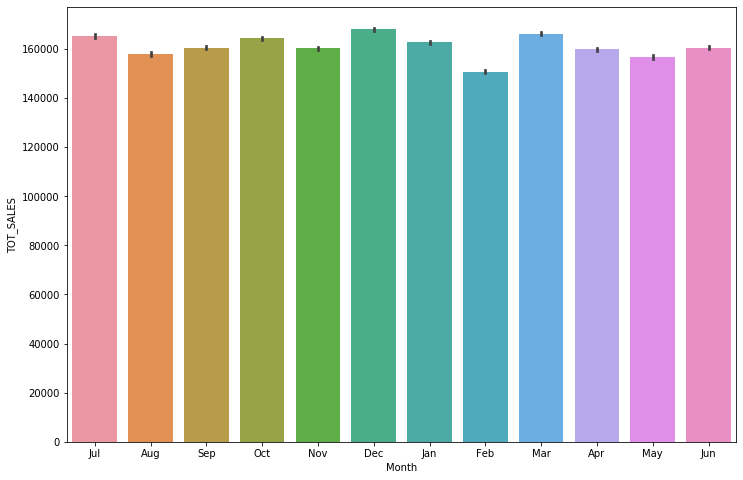

In [8]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Month',y='TOT_SALES',data=sorted_df,estimator=np.sum)
ax

# Monthly number of customers

In [9]:
ab = sorted_df.groupby(['Month'])['LYLTY_CARD_NBR'].nunique()
ab

Month
Apr    18164
Aug    18718
Dec    19076
Feb    17249
Jan    18463
Jul    18780
Jun    18264
Mar    18897
May    18608
Nov    18299
Oct    18570
Sep    18191
Name: LYLTY_CARD_NBR, dtype: int64

In [10]:
new_order = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May']
ab = ab.reindex(new_order, axis=0)
ab

Month
Jun    18264
Jul    18780
Aug    18718
Sep    18191
Oct    18570
Nov    18299
Dec    19076
Jan    18463
Feb    17249
Mar    18897
Apr    18164
May    18608
Name: LYLTY_CARD_NBR, dtype: int64

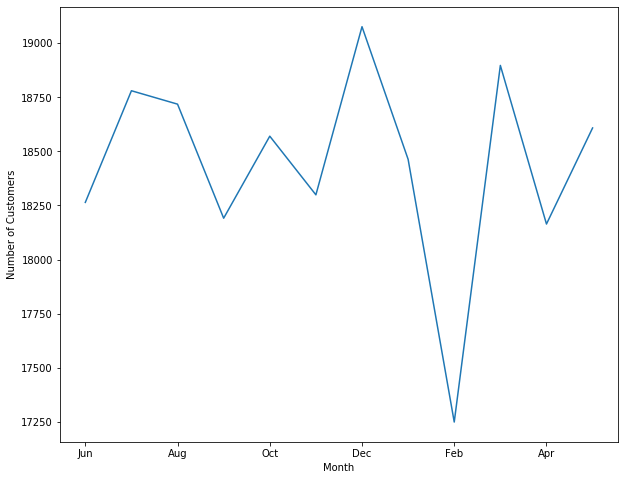

In [11]:
ab.plot(figsize=(10,8))
plt.ylabel('Number of Customers');


In [12]:
sorted_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month,Day
101808,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium,Jul,6
118872,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream,Jul,6
221754,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,Jul,6
147394,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream,Jul,6
29702,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,Jul,6


In [13]:
num_transaction = sorted_df.groupby('Month')['TXN_ID'].count()
total_cust = sorted_df.groupby('Month')['LYLTY_CARD_NBR'].nunique()

In [14]:
# Montly Number of transactions per customer
tran_per_cust = num_transaction/total_cust
tran_per_cust

Month
Apr    1.198304
Aug    1.197243
Dec    1.197054
Feb    1.182967
Jan    1.200292
Jul    1.201384
Jun    1.195193
Mar    1.195534
May    1.203300
Nov    1.194164
Oct    1.200215
Sep    1.195261
dtype: float64

In [15]:
# Total sales for each store per month
total_sales = sorted_df.groupby(['STORE_NBR','Month'])['TOT_SALES'].sum()
total_sales

STORE_NBR  Month
1          Apr      192.9
           Aug      176.1
           Dec      189.6
           Feb      225.4
           Jan      154.8
                    ...  
272        Mar      442.3
           May      314.6
           Nov      376.2
           Oct      430.6
           Sep      304.7
Name: TOT_SALES, Length: 3169, dtype: float64

In [19]:
# Total  number of customers for each store per month
total_customer = sorted_df.groupby(['STORE_NBR','Month'])['LYLTY_CARD_NBR'].nunique()

# Total  number of transaction for each store per month
total_transac = sorted_df.groupby(['STORE_NBR','Month'])['TXN_ID'].count()

# Transaction per customer 
tranc_per_cust = total_transac/total_customer
tranc_per_cust

STORE_NBR  Month
1          Apr      1.023810
           Aug      1.023810
           Dec      1.119048
           Feb      1.057692
           Jan      1.028571
                      ...   
272        Mar      1.060000
           May      1.176471
           Nov      1.097561
           Oct      1.159091
           Sep      1.125000
Length: 3169, dtype: float64